In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('salaries-merged2.csv')

In [3]:
# eliminate rows with missing Y values (NaN)
# eliminate rows with missing income/zip data (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal['missingMedian'] = pd.isnull(sal['median'])
sal2 = sal[(sal.missingSalary == False) & (sal.missingMedian == False)]

sal2.head(5)

,Unnamed: 0,function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,...,zip,country,category,instsize,insttype,median,mean,pop,missingSalary,missingMedian
0,2211,position22,0,0,0,4,1,49088,Man,False,...,99775,United States,one,9223,Public Institution,79357,120734,1251,False,False
1,2212,position15,0,0,0,0,0,48131,Man,True,...,99775,United States,one,9223,Public Institution,79357,120734,1251,False,False
2,2216,position20,1,0,1,6,1,51625,Man,False,...,99775,United States,one,9223,Public Institution,79357,120734,1251,False,False
3,2217,position6,0,0,1,30,5,54225,Woman,False,...,99775,United States,one,9223,Public Institution,79357,120734,1251,False,False
4,2218,position10,0,0,0,7,0,67495,Woman,False,...,99775,United States,one,9223,Public Institution,79357,120734,1251,False,False


In [4]:
sal2.mean()

Unnamed: 0              1024.196911
sup1                       1.393050
sup2                       0.591506
sup3                       0.592278
sup4                      47.639382
sup5                       3.723552
salary                 48635.030211
disabled                   0.013900
yearsinposition            5.936170
yearsinprofession          9.349155
age                       38.245981
cred1                      0.071815
cred2                      0.027027
inst1                     15.583784
inst2                      4.871042
inst3                      3.433205
inst4                    293.491892
inst5                     24.653282
instbudget           3761635.823129
zip                    52828.590734
instsize               21598.949573
median                 41976.152896
mean                   60579.115715
pop                    19201.898069
missingSalary              0.000000
missingMedian              0.000000
dtype: float64

In [5]:
# eliminate rows with missing Y values (NaN)
#sal['missingSalary'] = pd.isnull(sal['salary'])
#sal['missingMean'] = pd.isnull(sal['mean'])
#sal2 = sal[(sal.missingSalary == False) & (sal.missingMean == False)]


In [6]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
         'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instbudget', 'instsize',
        'median','mean','pop']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['function', 'gender', 'race', 'highestdegree', 'category', 'insttype']
X_categorical = sal2[X_categorical_features]

In [7]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Function_dummies = pd.get_dummies(X_categorical['function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
Category_dummies = pd.get_dummies(X_categorical['category'])
instType_dummies = pd.get_dummies(X_categorical['insttype'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [8]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html
# default is imputing the mean
from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [9]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [10]:
# y is salary
y = sal2.iloc[:, 7].values
#y = np.sqrt(y_all)

In [11]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [52]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08
# best residual sum of squares from first try Ridge Best 
var_to_graph['first_RIDGE'] = 97978320.56
#best resiudal sum of squares with Ridge alpha of 200
var_to_graph['second_RIDGE'] = 93950804.80
#best residual sum of squares with Polynomial Lasso alpha of 100
var_to_graph['poly_lasso'] = 92771351.24

In [13]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 11308.455343
Coefficients: 
 [  4.18058036e+03  -5.83110943e+03  -8.73524282e+03  -1.16671408e+04
  -3.73429322e+03   1.05285254e+03  -1.01133690e+04  -1.10413927e+04
  -7.99989546e+03   8.74863775e+02  -7.57615395e+03  -8.49135567e+03
  -8.25059730e+03  -9.17647736e+03  -9.76440284e+03  -1.52949751e+03
  -8.13701184e+03  -1.10458526e+04  -1.22743440e+03  -1.27833097e+04
  -4.32345035e+03  -1.45220537e+03  -9.16078409e+03  -5.06371969e+03
  -8.97780780e+03  -1.51623587e+04  -4.52685759e+03  -9.03056063e+03
  -2.69104439e+03  -3.84825165e+03   2.40243220e+03   7.63698395e+03
   7.02483800e+03   4.45372444e+03   5.52078345e+02   1.72018587e+04
   3.81512467e+03   4.95161742e+03   6.12694704e+03   1.31949487e+04
   1.04932918e+04  -2.35427285e+02   2.62123926e+03  -2.62123926e+03
   7.15682379e+03   5.31540948e+03   1.37887004e+03   1.05893152e+03
  -2.62348467e+02   1.46224953e+01   8.03077979e+01  -1.82645449e+03
   5.06279835e+01   2.75307343e+02   2.47867101e+02   3.00166

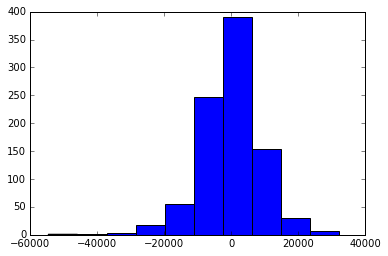

Distribution of prediction error on test data:


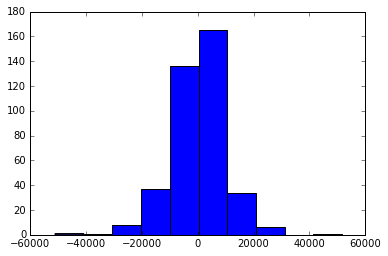

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [16]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 19112.4746389
Coefficients: 
 [  1.14620975e+04   3.74388233e+02  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.01469220e+03  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -2.07096485e+03   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   4.24761220e+03  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   4.62158795e+02  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.32641127e+03  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   1.56733050e+03
   3.66194596e+03  -5.32183081e+03   0.00000000e+00  -0.00000000e+00
   1.54177473e+03  -0.00000000e+00   1.57654497e+03   1.13478341e+03
  -3.72890026e+01   7.05402502e+00   6.84767044e+01  -0.00000000e+00
   6.51186681e-01   3.81278059e+02   1.94026382e+02   2.3231

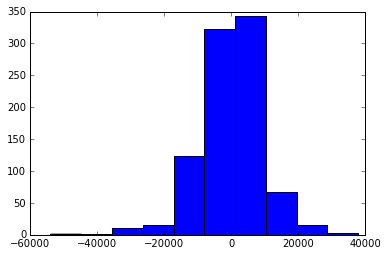

Distribution of prediction error on test data:


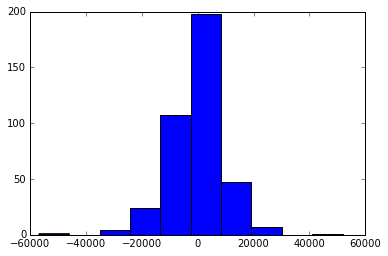

In [50]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.Lasso(alpha=100)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 21060.8493622
Coefficients: 
 [  4.50082070e+03   4.45212380e+02  -2.93129423e+02  -3.66432772e+02
   5.21044901e+02   6.93284533e+02  -1.34509661e+03  -1.06010700e+02
  -2.96150101e+02   3.69656593e+02   4.82814572e+01  -5.04798801e+02
  -7.56227958e+01  -1.80595131e+02  -9.24106760e+02   1.50031223e+02
   4.28322761e+01  -1.78505898e+03   1.32915932e+02  -3.13945252e+02
   4.97599022e+00   1.36327600e+03  -5.54678008e+02   4.86932471e+02
  -6.32337780e+02  -5.70311152e+02   9.19746675e+01  -8.00341734e+02
   6.12021709e+02  -1.08140042e+02  -6.53898340e+02   6.04529198e+02
   1.38365881e+02   1.21113489e+03  -7.57411916e+02   1.20060234e+02
   5.68797519e+01  -2.45652199e+02  -2.42863847e+02   1.04779225e+03
   3.24186252e+03  -2.78712422e+03   5.81803136e+02  -5.81803136e+02
   1.31356058e+03  -6.03768430e+02   1.76747492e+03   1.22500727e+03
   1.24970272e+01   7.28887518e+00   7.75636364e+01  -3.31558803e+02
  -6.59880231e+01   5.16487746e+02   1.74647613e+02   1.6133

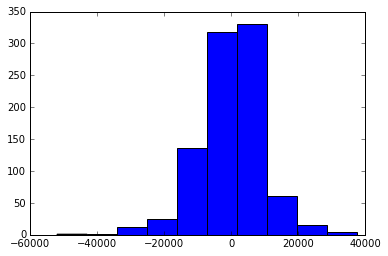

Distribution of prediction error on test data:


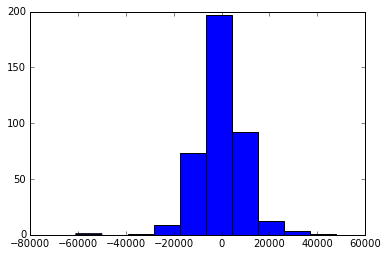

In [38]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
#so far in the default
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
#regr = linear_model.Lasso(alpha=0.00001, max_iter=10000)
regr = linear_model.Ridge(alpha=100, max_iter=10000)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

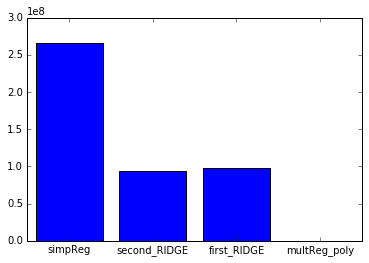

In [51]:
# bar graph of dict with Residual Sum of Squares on test datasets

var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()